In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe() # count를 보면 Null이 존재하는걸 볼 수 있다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
for col in df_train.columns :
    msg = 'column : {:>10}\t Percent of NaN Value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN Value : 0.00%
column :   Survived	 Percent of NaN Value : 0.00%
column :     Pclass	 Percent of NaN Value : 0.00%
column :       Name	 Percent of NaN Value : 0.00%
column :        Sex	 Percent of NaN Value : 0.00%
column :        Age	 Percent of NaN Value : 19.87%
column :      SibSp	 Percent of NaN Value : 0.00%
column :      Parch	 Percent of NaN Value : 0.00%
column :     Ticket	 Percent of NaN Value : 0.00%
column :       Fare	 Percent of NaN Value : 0.00%
column :      Cabin	 Percent of NaN Value : 77.10%
column :   Embarked	 Percent of NaN Value : 0.22%


In [8]:
for col in df_test.columns :
    msg = 'column : {:>10}\t Percent of NaN Value : {:2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test.shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN Value : 0.000000%
column :     Pclass	 Percent of NaN Value : 0.000000%
column :       Name	 Percent of NaN Value : 0.000000%
column :        Sex	 Percent of NaN Value : 0.000000%
column :        Age	 Percent of NaN Value : 20.574163%
column :      SibSp	 Percent of NaN Value : 0.000000%
column :      Parch	 Percent of NaN Value : 0.000000%
column :     Ticket	 Percent of NaN Value : 0.000000%
column :       Fare	 Percent of NaN Value : 0.239234%
column :      Cabin	 Percent of NaN Value : 78.229665%
column :   Embarked	 Percent of NaN Value : 0.000000%


<AxesSubplot:>

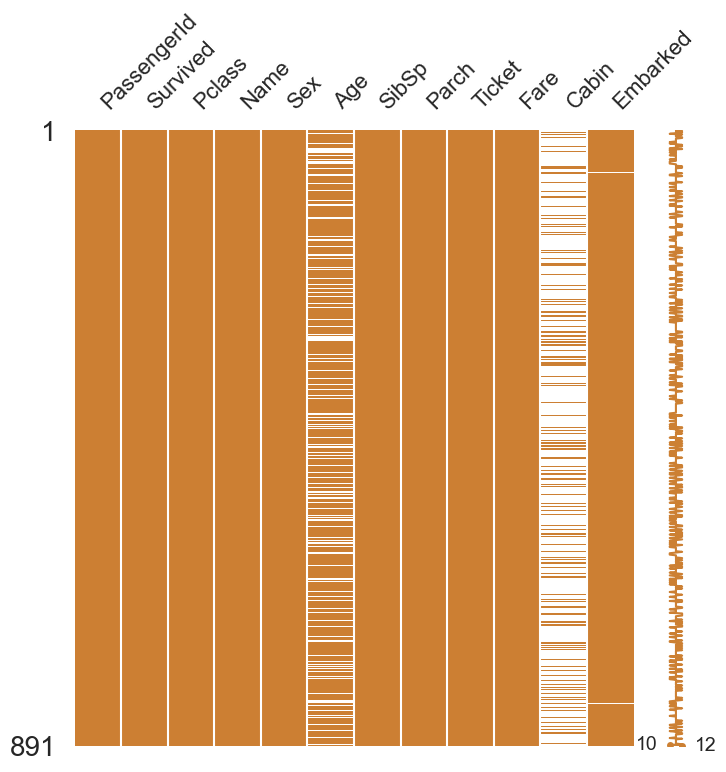

In [9]:
msno.matrix(df=df_train, figsize=(8,8),color=(0.8,0.5,0.2))

<AxesSubplot:>

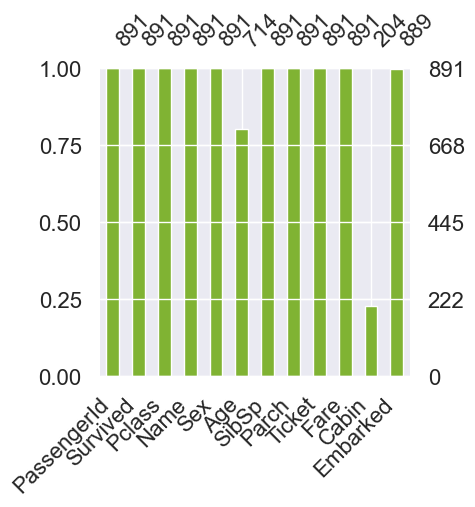

In [10]:
msno.bar(df=df_train, figsize=(4,4), color=(0.5,0.7,0.2))

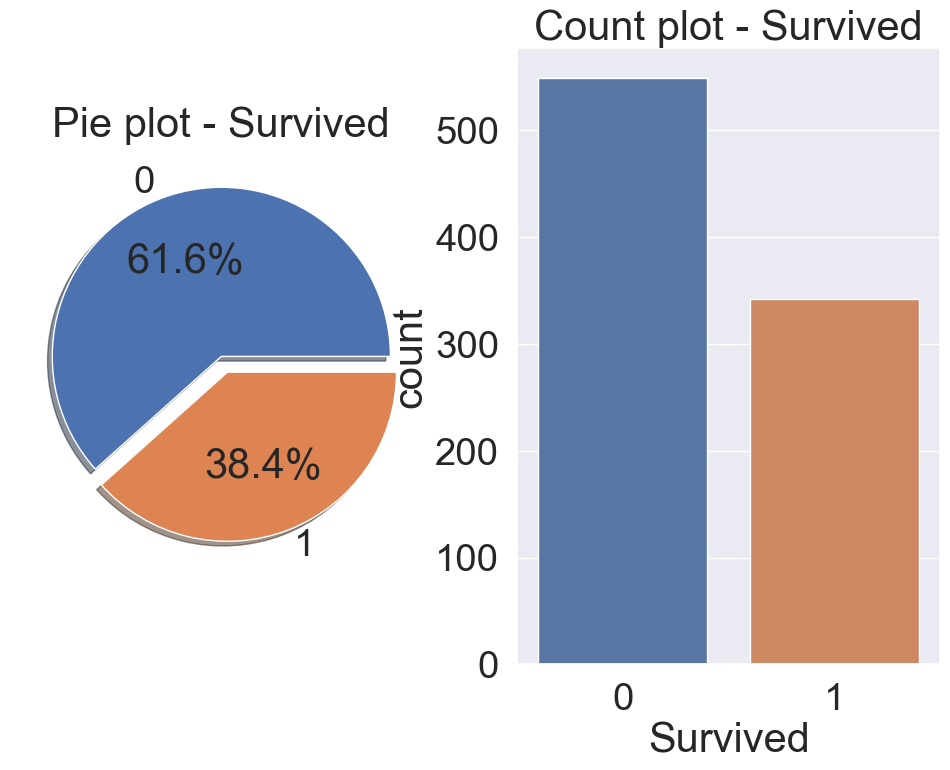

In [11]:
# 만약 target label이 한 쪽으로 편향되어 있다면(예를 들어 생존99:사망1이라면)
# 모델이 그냥 다 생존으로 찍어버려도 성능은 99%지만 사망자를 찾을 수 없게되므로 target label의 분포를 확인하는 것은 중요하다

f, ax = plt.subplots(1,2,figsize=(12,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# EDA - Pclass

In [12]:
df_train[['Pclass','Survived']].groupby('Pclass',as_index=True).count() # 각 클래스 별로 몇 명이 있는지

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
df_train[['Pclass','Survived']].groupby(by='Pclass', as_index=False).sum() # 각 클래스 별로 생존자가 몇 명인지

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [14]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')  # color scheme map 검색

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

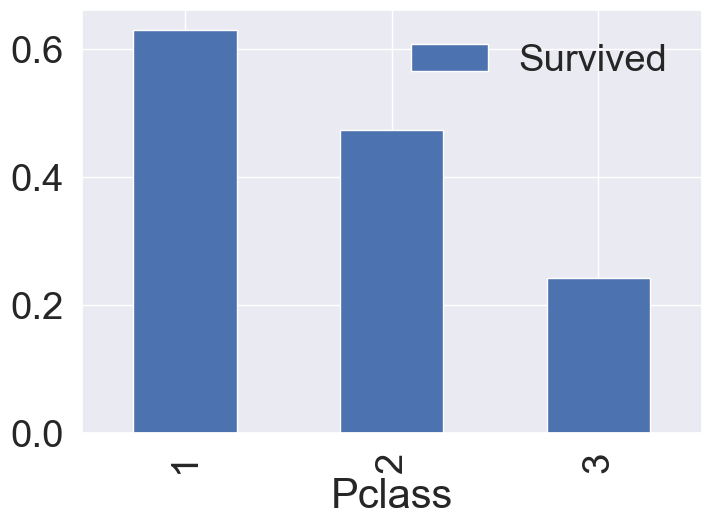

In [15]:
df_train[['Pclass','Survived']].groupby(by=['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

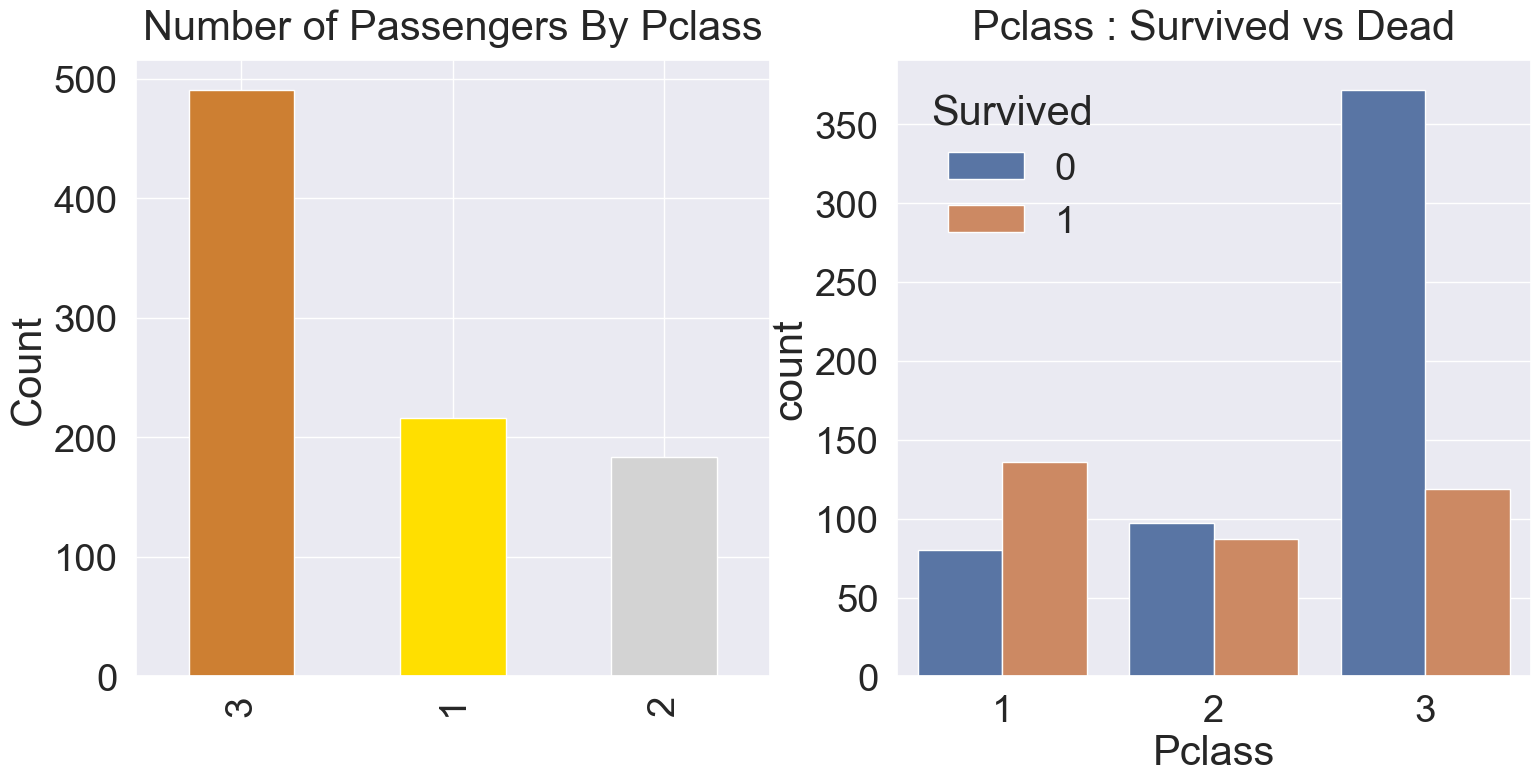

In [16]:
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)
plt.show()

# EDA - Sex

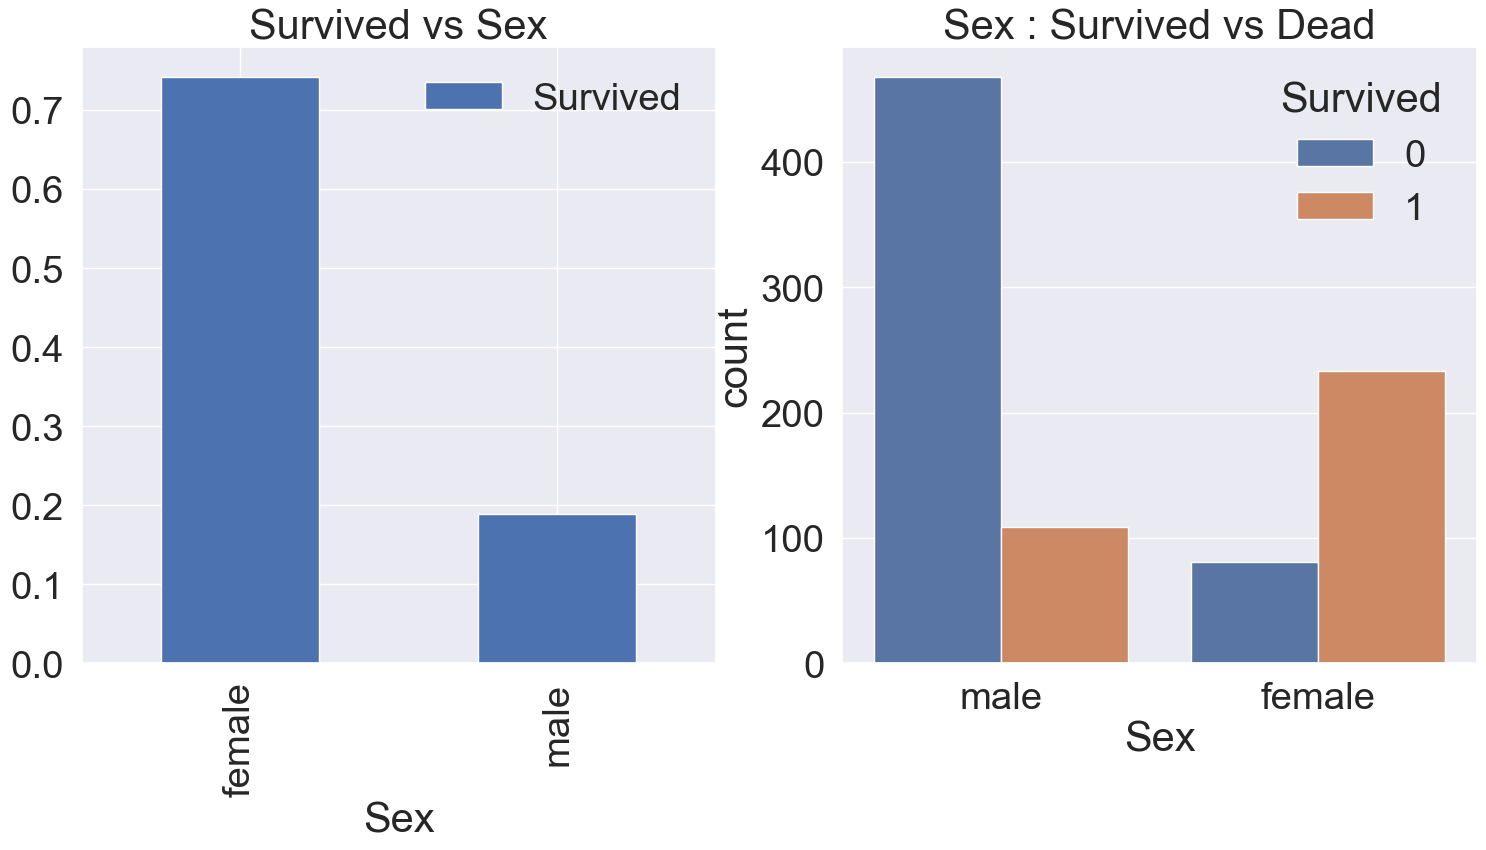

In [17]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby('Sex',as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',data=df_train,hue='Survived',ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

In [18]:
df_train[['Sex','Survived']].groupby('Sex', as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [19]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


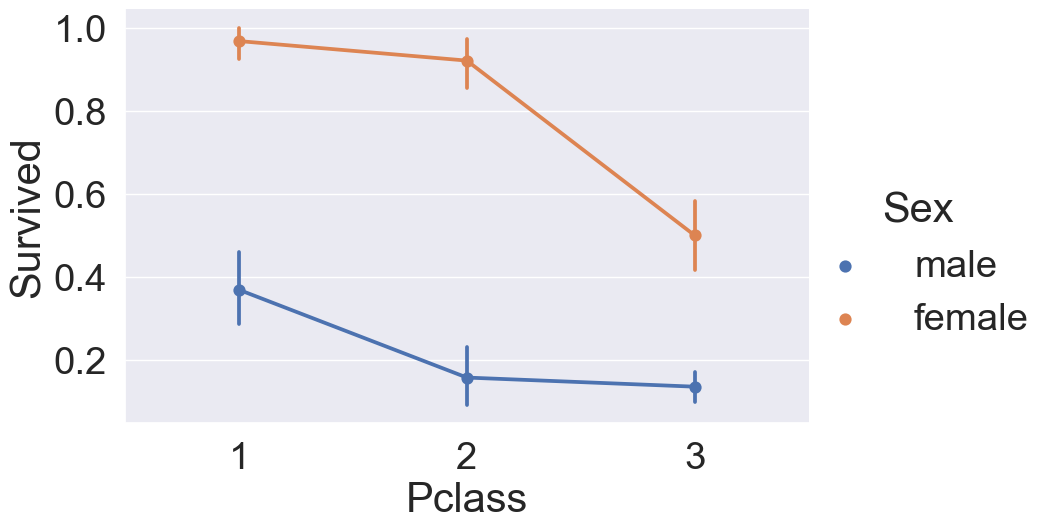

In [20]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

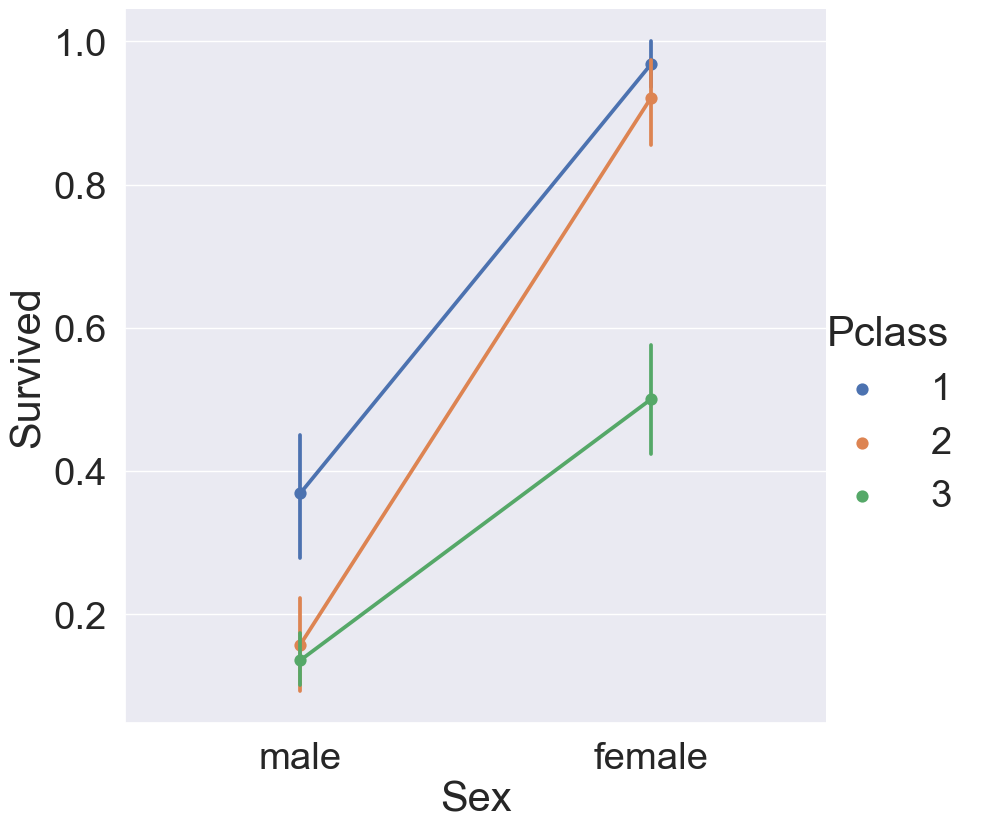

In [21]:
sns.factorplot(x='Sex',y='Survived',hue='Pclass',data=df_train,saturation=5,size=9,aspect=1)

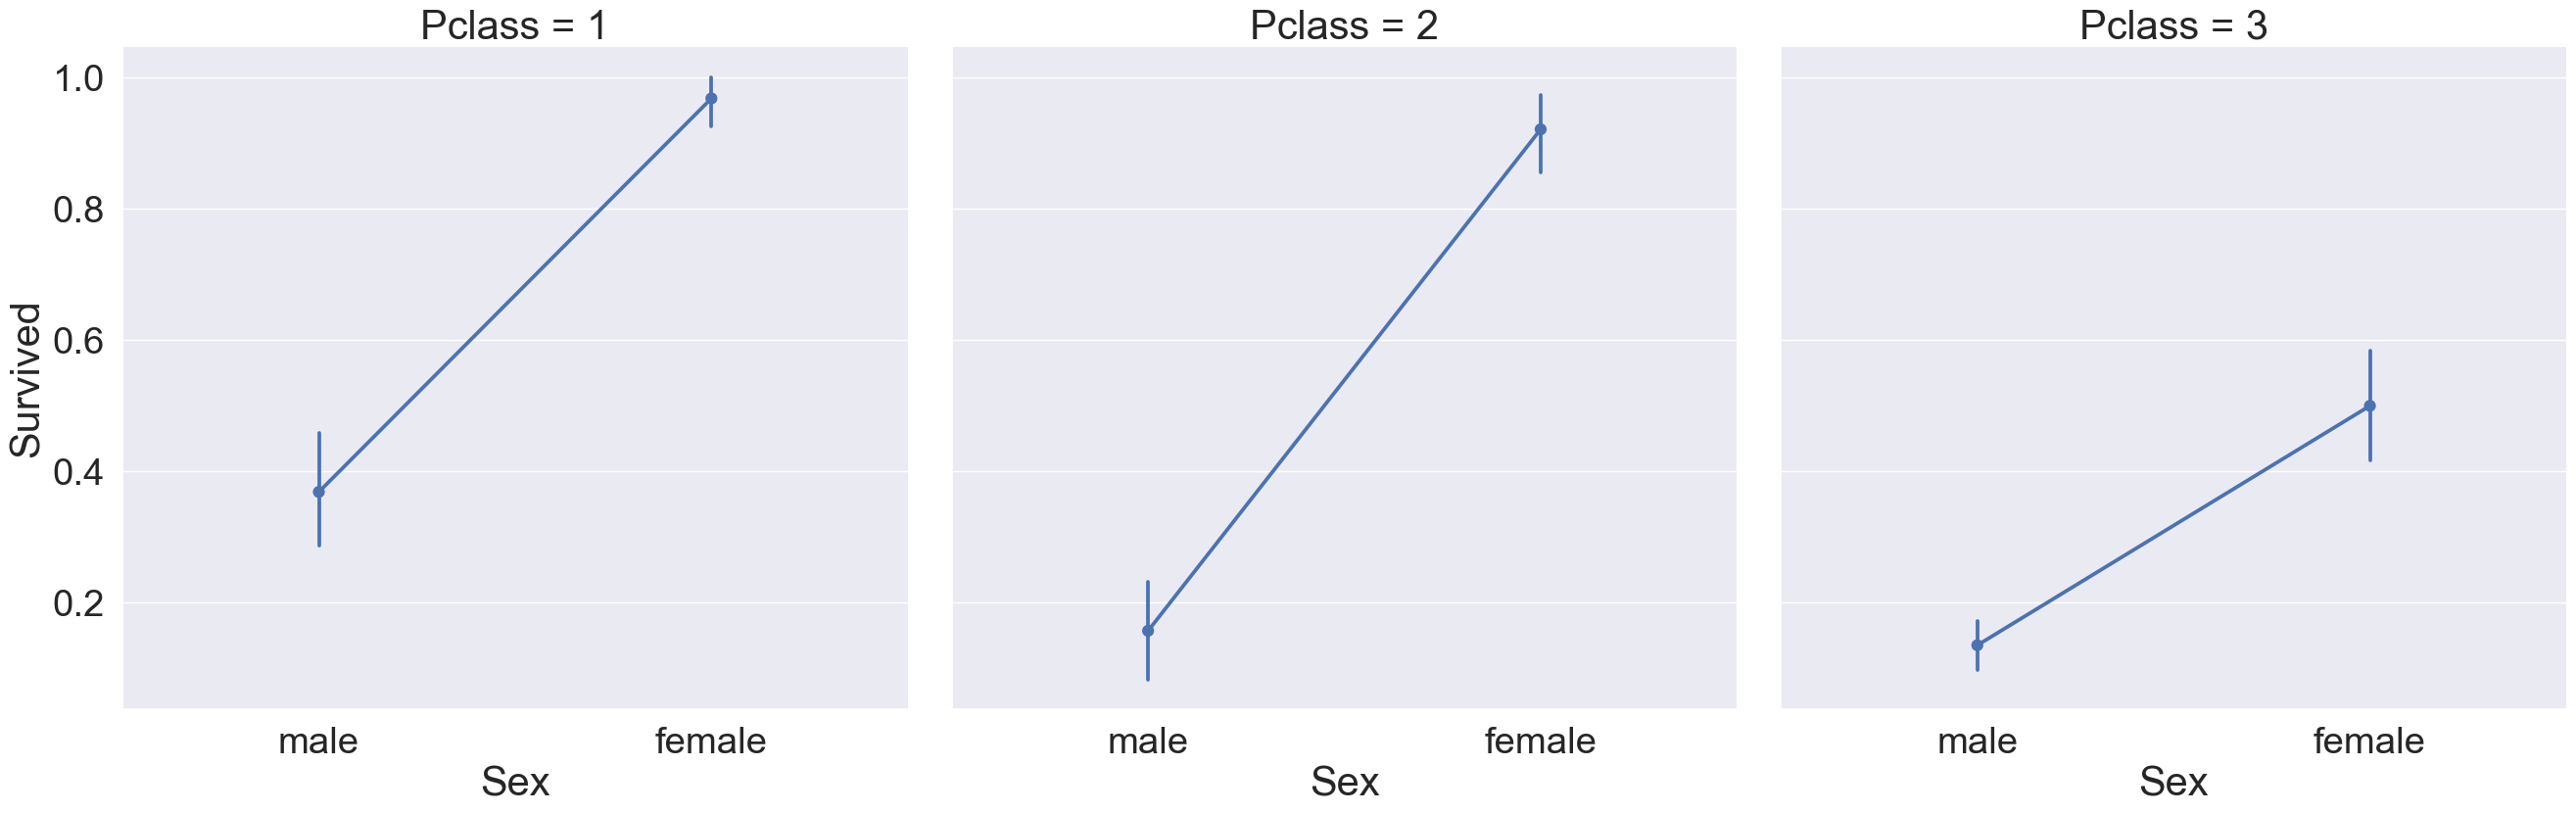

In [22]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,saturation=5,size=9,aspect=1)

# EDA - Age

In [23]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


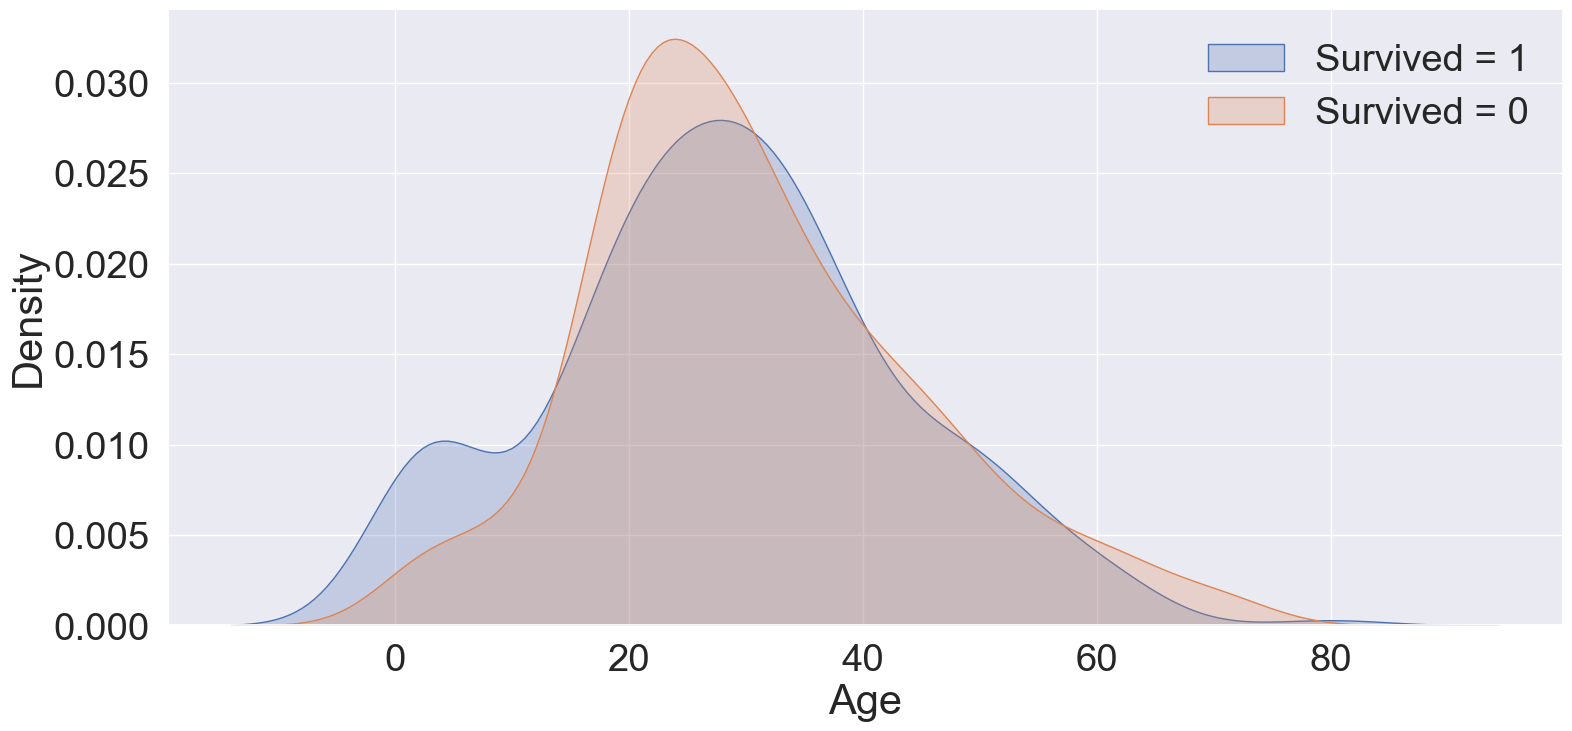

In [24]:
fig, ax = plt.subplots(1,1,figsize=(18,8))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax,shade=True)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax,shade=True)
plt.legend(['Survived = 1','Survived = 0'])
plt.show()

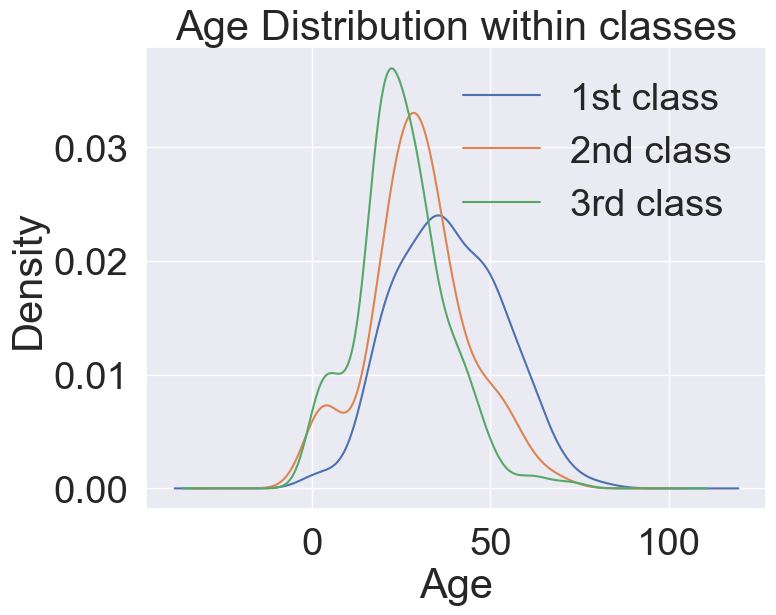

In [25]:
plt.figure(figsize=(8,6))
df_train[df_train['Pclass']==1]['Age'].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class','2nd class','3rd class'])

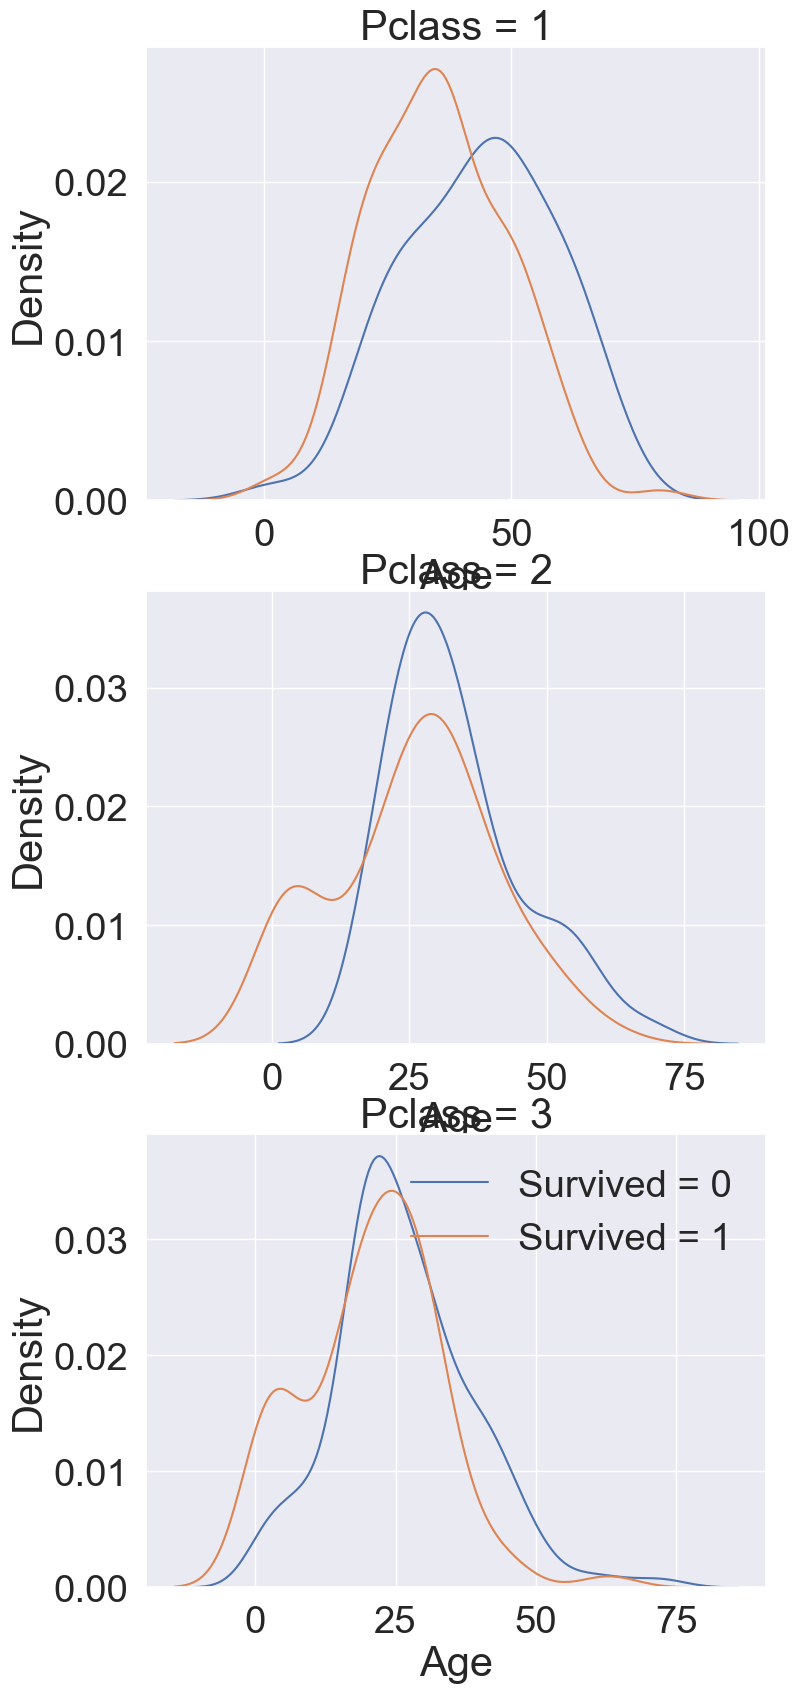

In [26]:
fig, ax = plt.subplots(3,1,figsize=(8,20))
for i in range(0,3) : 
    sns.kdeplot(df_train['Age'][(df_train['Pclass']==i+1) & (df_train['Survived']==0)],ax=ax[i])
    sns.kdeplot(df_train['Age'][(df_train['Pclass']==i+1) & (df_train['Survived']==1)],ax=ax[i])
    plt.legend(['Survived = 0','Survived = 1'])
    ax[i].set_title(f'Pclass = {i+1}')
plt.show()

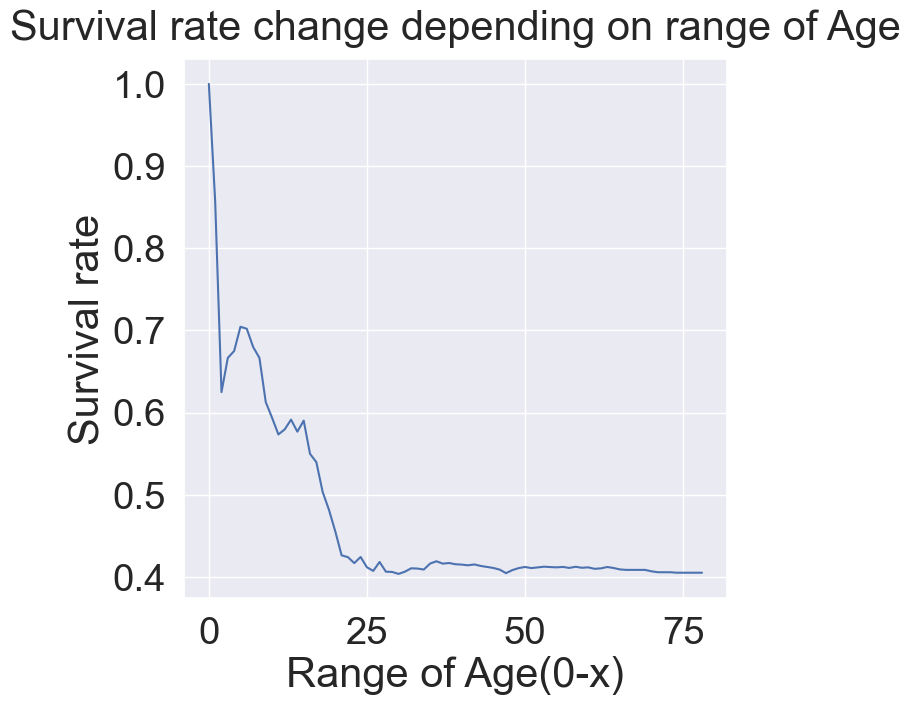

In [27]:
# 나이와 생존률은 연관성이 있는가?

change_age_range_survival_ratio = []

for i in range(1,80) :
    change_age_range_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

# EDA - Pclass, Sex, Age

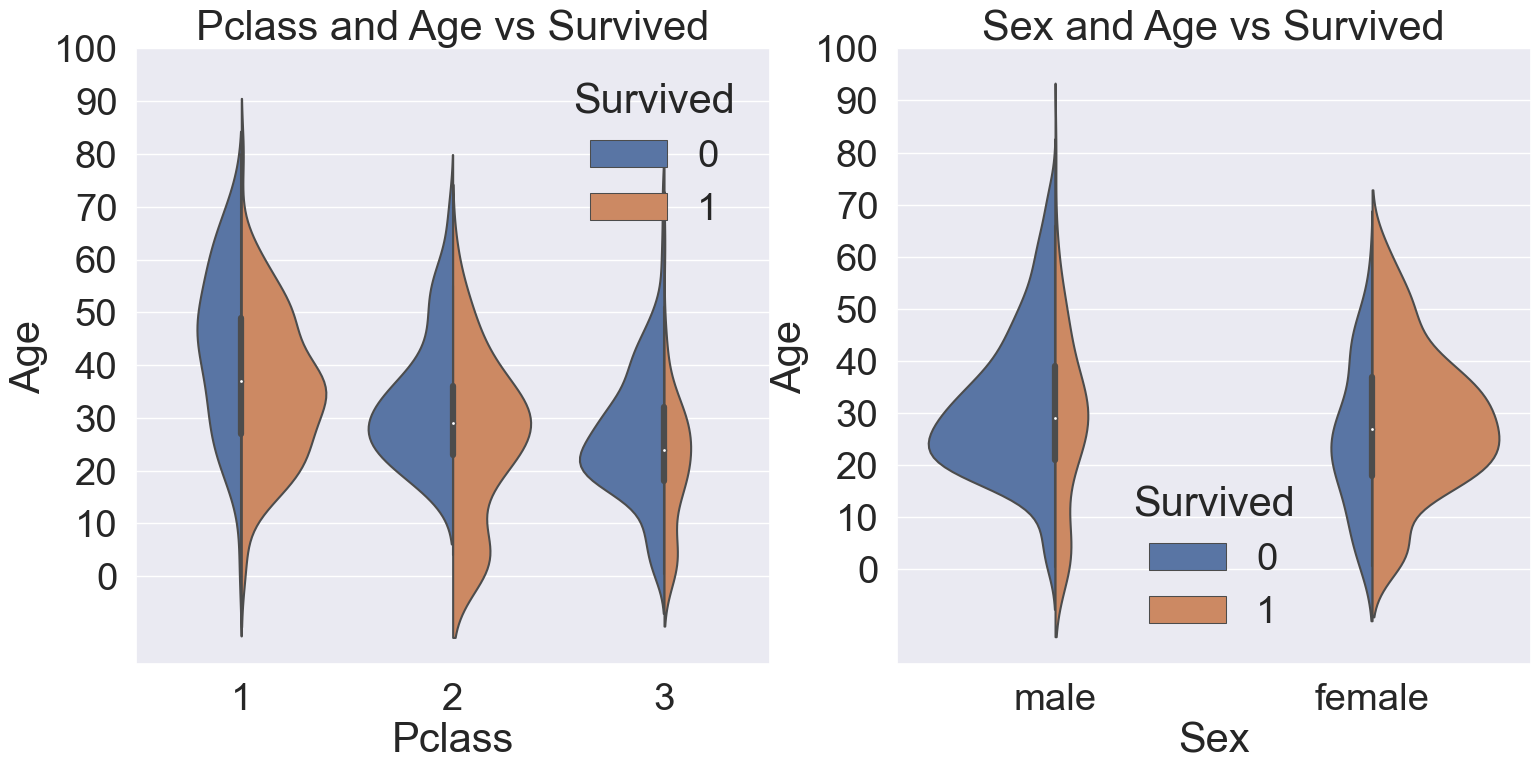

In [28]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[0]) # scale을 area로 하면 면적은 같아지지만..
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived',data=df_train,scale='count',split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

# EDA - Embarked

Text(0.5, 1.0, 'Embarked')

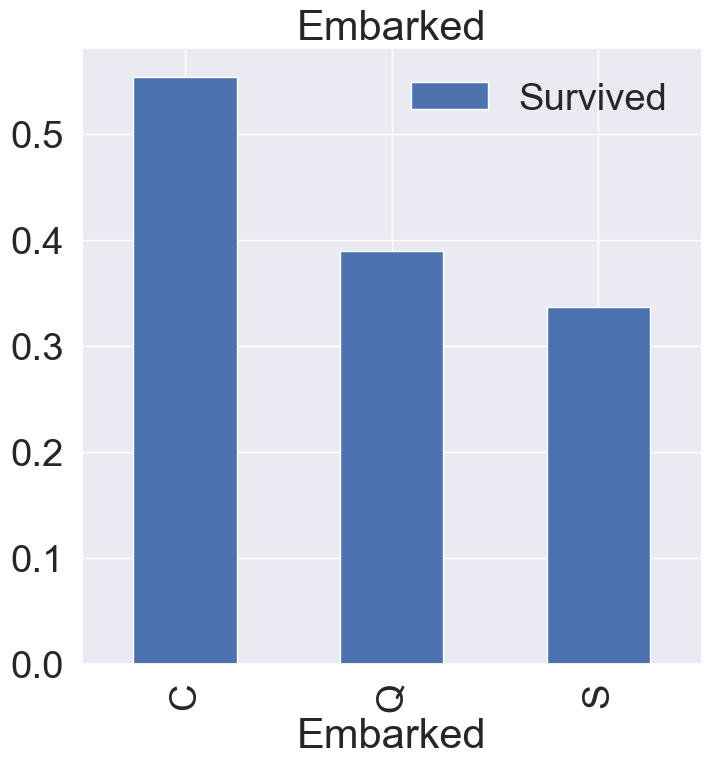

In [29]:
f, ax = plt.subplots(1,1,figsize=(8,8))
df_train[['Embarked','Survived']].groupby('Embarked',as_index=True).mean().plot.bar(ax=ax)
ax.set_title('Embarked')

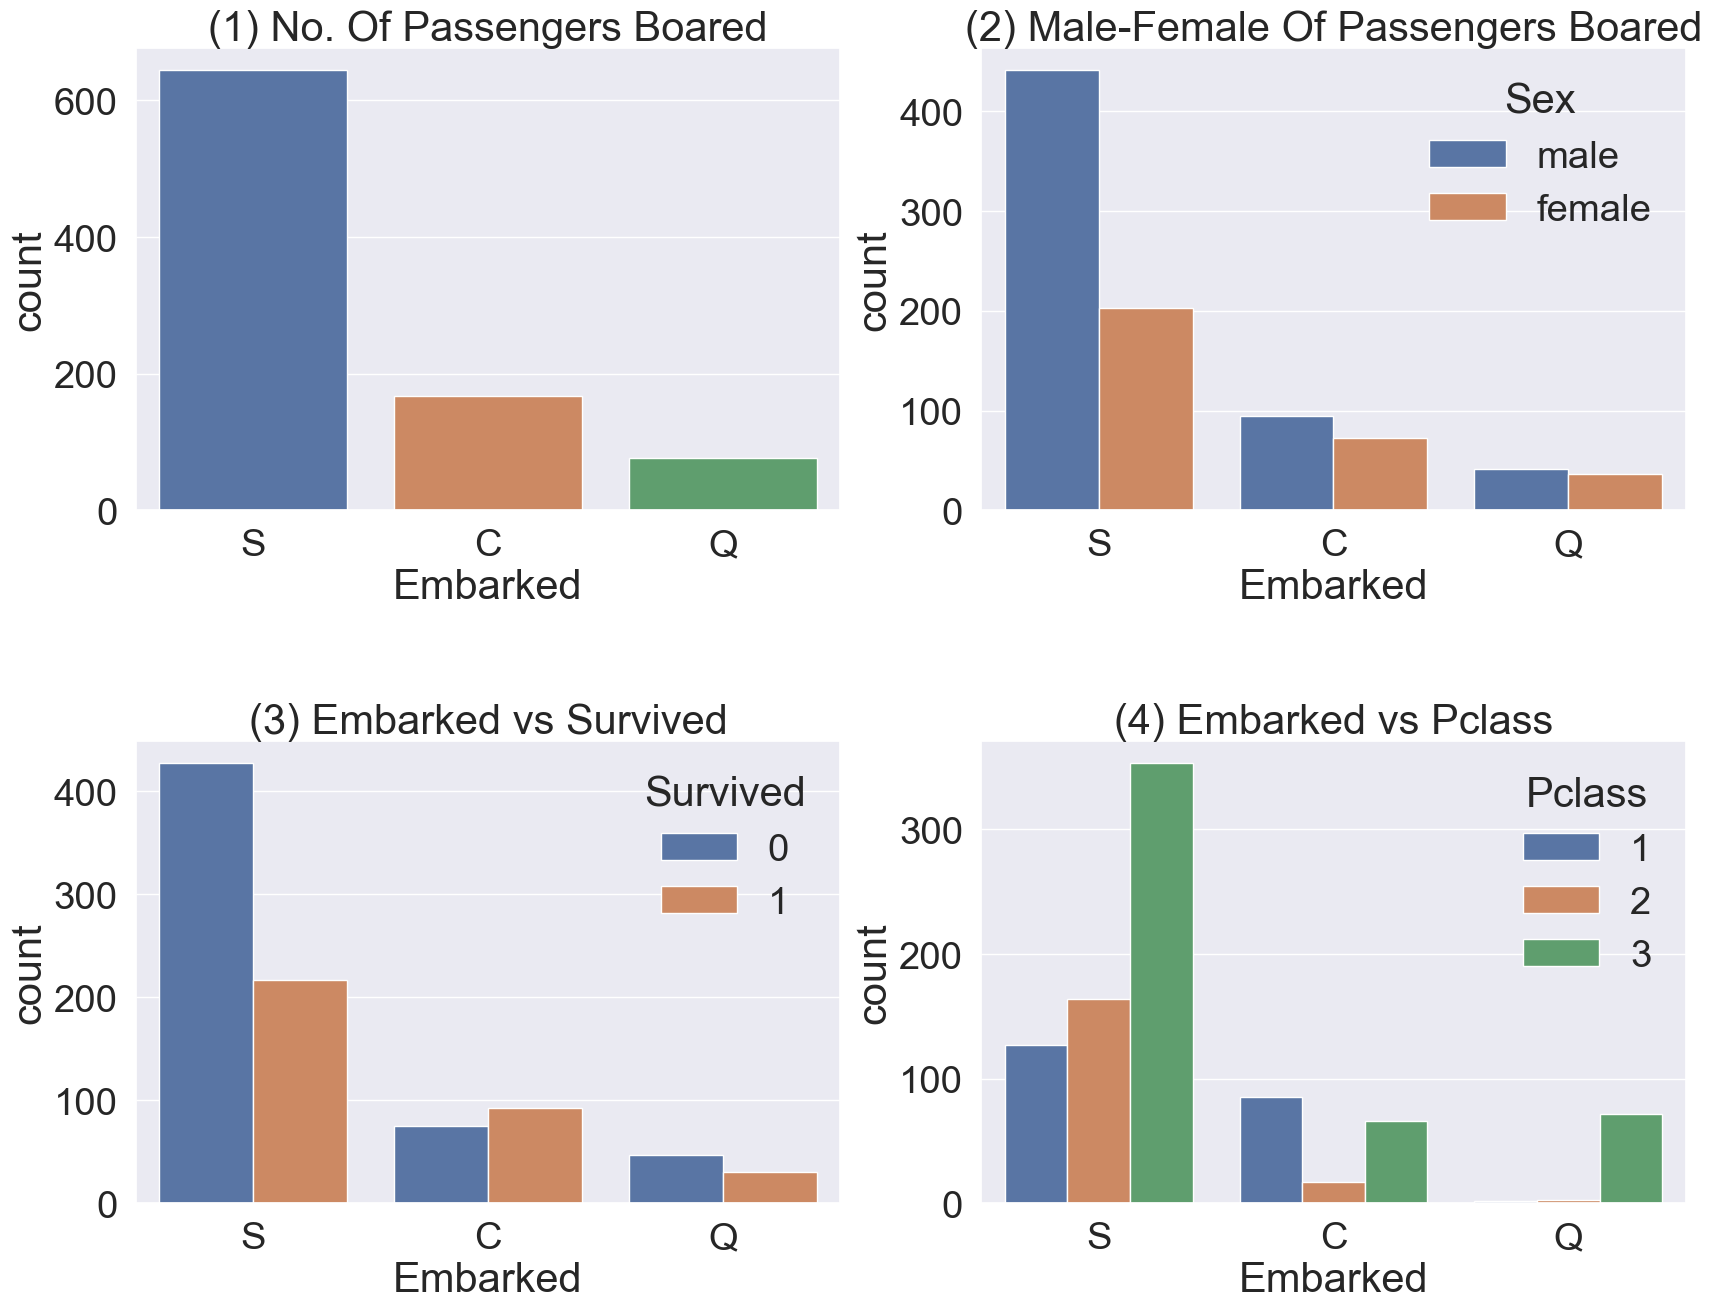

In [30]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boared')

sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Of Passengers Boared')

sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5) # 상하좌우간격을 맞춰주는 옵션
plt.show()

# EDA - Family(SibSp + Parch)

In [31]:
df_train['FamilySize'] = df_train['SibSp'] +  df_train['Parch'] + 1

In [32]:
print(f'Maximum size of Family : {df_train["FamilySize"].max()}')
print(f'Minimum size of Family : {df_train["FamilySize"].min()}')

Maximum size of Family : 11
Minimum size of Family : 1


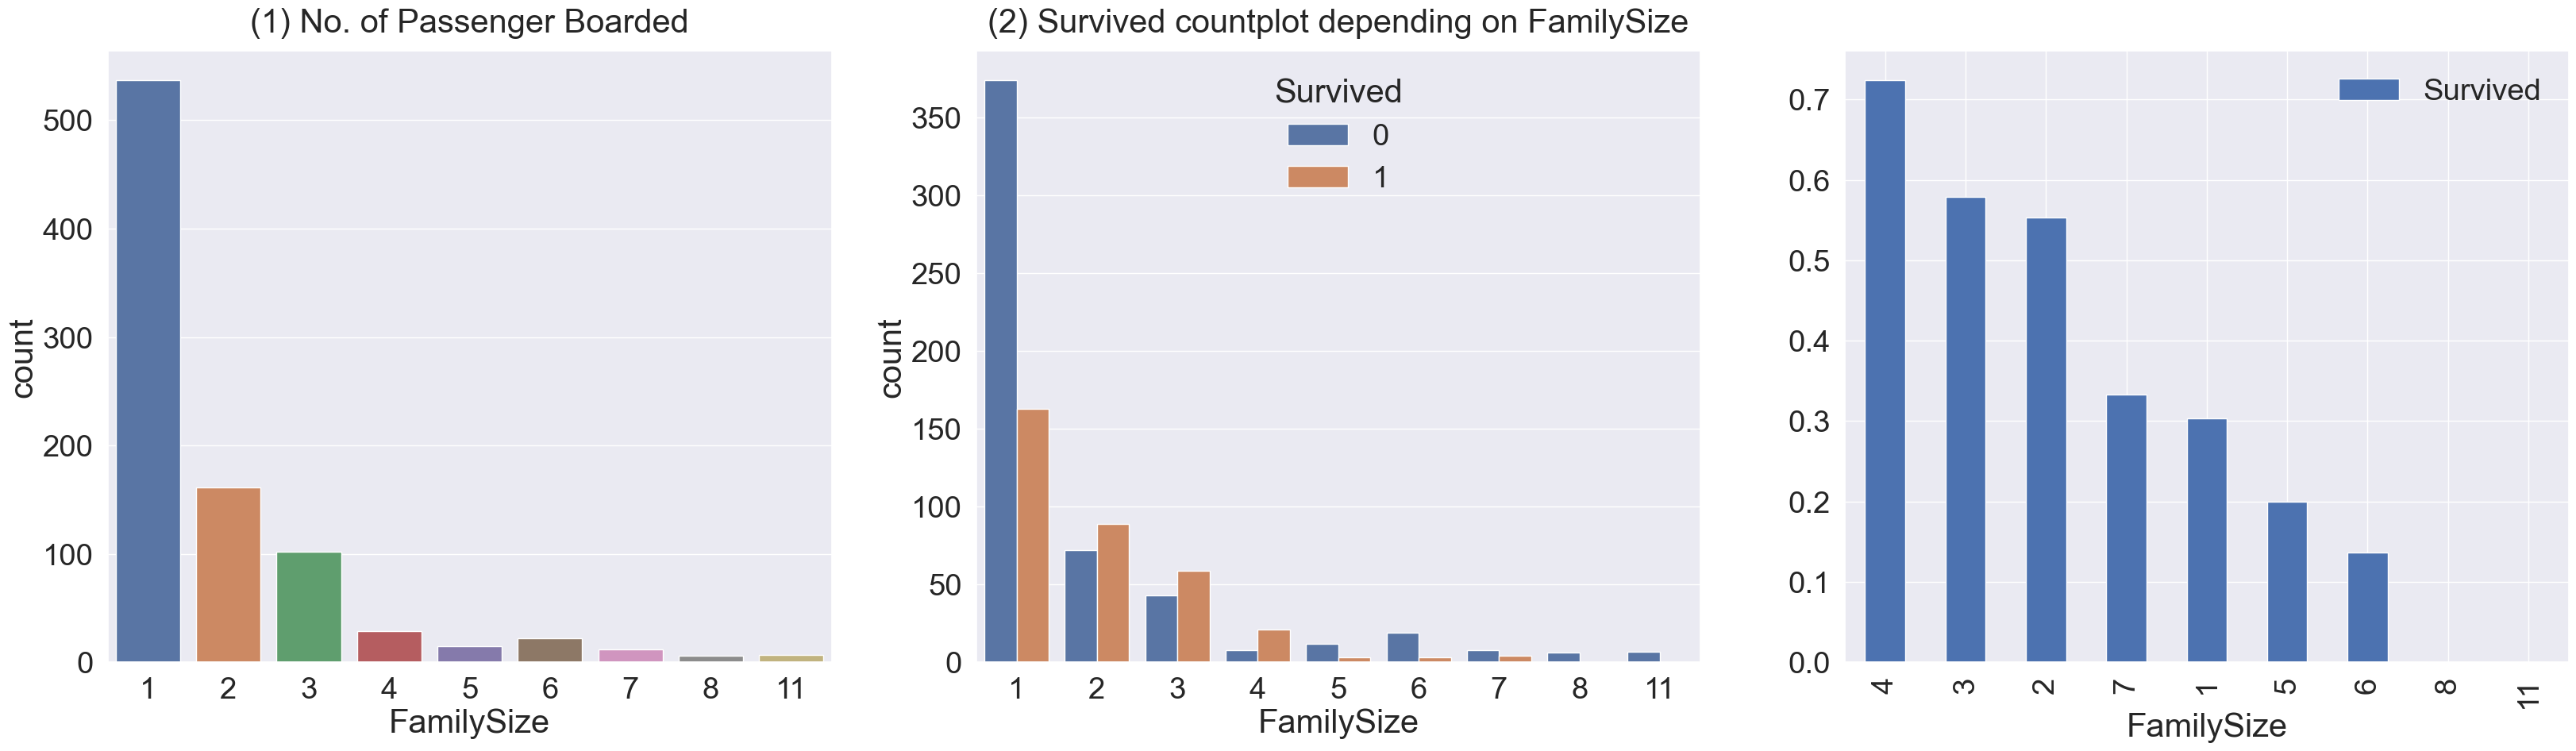

In [33]:
f, ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1) No. of Passenger Boarded', y=1.02)

sns.countplot('FamilySize',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# EDA - Fare, Cabin, Ticket

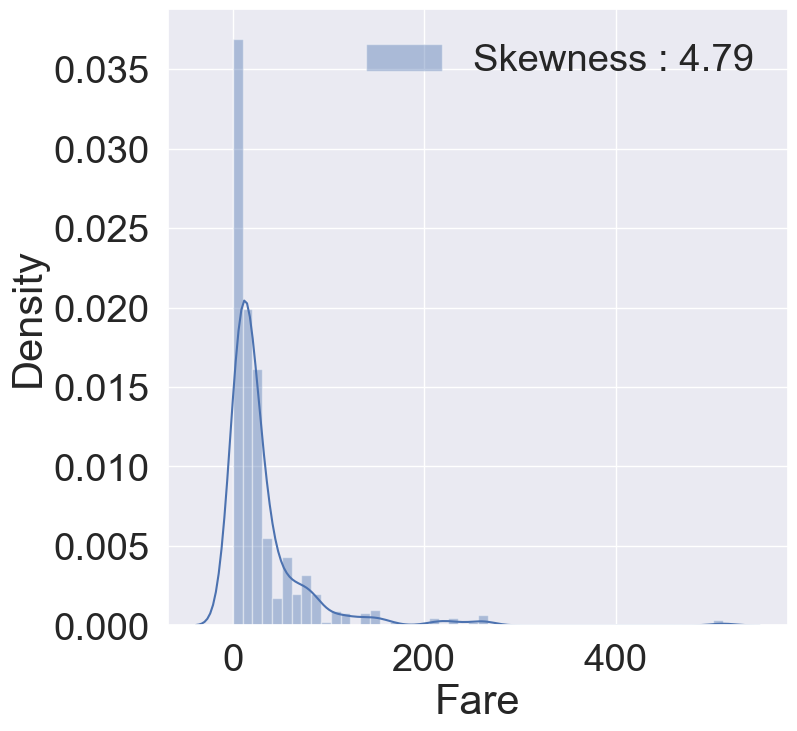

In [34]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [35]:
# Skewness를 줄여주는 과정
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)

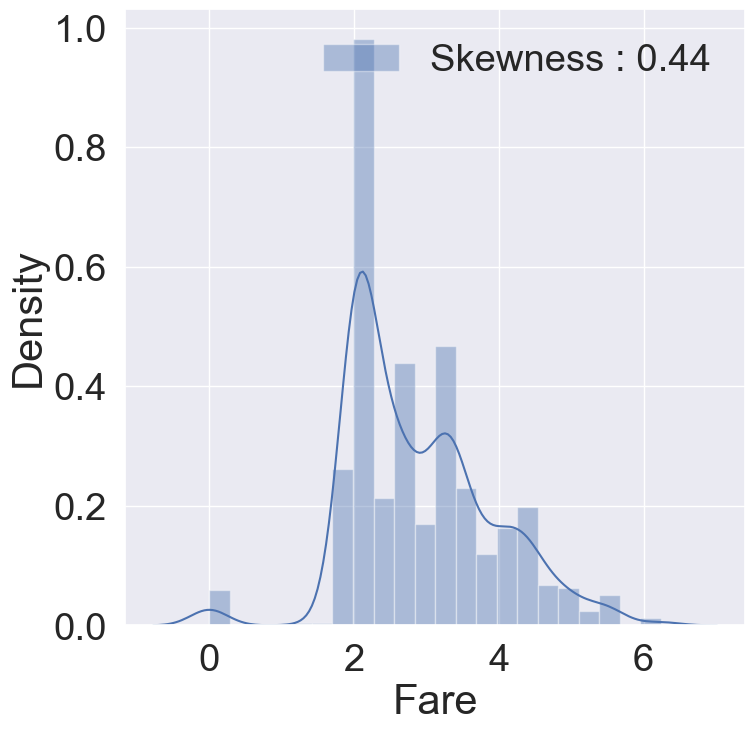

In [36]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [37]:
df_train['Ticket'].value_counts() # 티켓 피쳐를 쓰고싶으면 아이디어 내야함
# cabin도 80%가 NaN이므로 버리도록 한다.

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# Feature Engineering - Age
실제 학습에 사용되므로 train 뿐 아니라 test에도 적용되어야 한다.

In [38]:
df_train['Age'].isnull().sum()

177

In [39]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]*)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]*)\.')

In [40]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='cool')
# 결과를 보면 Mr, Mrs 말고도 Don, Dr, Capt 같은 것들도 많다. 이들을 바꿔주자

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [41]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [42]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

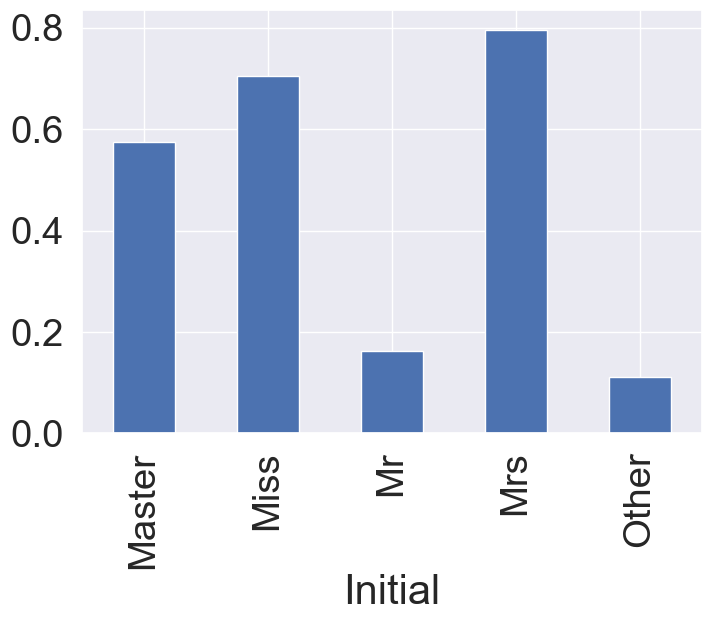

In [43]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [44]:
df_all = pd.concat([df_train, df_test])

In [45]:
df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,15.442677,4.675000
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,14.021188,2.236559
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,10.003941,1.444234
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.511811
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,24.523034,1.222222


In [46]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mr'),'Age']=33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mrs'),'Age']=37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Master'),'Age']=5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Miss'),'Age']=22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Other'),'Age']=45

In [47]:
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mr'),'Age']=33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mrs'),'Age']=37
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Master'),'Age']=5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Miss'),'Age']=22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Other'),'Age']=45

# Feature Engineering - Embarked

In [48]:
df_train['Embarked'].fillna('S',inplace=True) # 그냥 제일 많았던게 S라서

In [49]:
# Continuous Feature를 Category로 해보자
def category_age(x) :
    if x<10 :
        return 0
    if x<20 :
        return 1
    if x<30 :
        return 2
    if x<40 :
        return 3
    if x<50 :
        return 4
    if x<60 :
        return 5
    if x<70 :
        return 6
    else :
        return 7

In [50]:
df_train['Age_cat'] = df_train['Age'].apply(category_age)

In [51]:
df_train.drop(['Age'],axis=1,inplace=True)

# Feature Engineering - String to Categorical

In [52]:
df_train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [53]:
df_train['Initial'] = df_train['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})

In [54]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [55]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [56]:
df_train['Sex'] = df_train['Sex'].map({'female':0,'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0,'male':1})

# Pearson Correlation

In [57]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

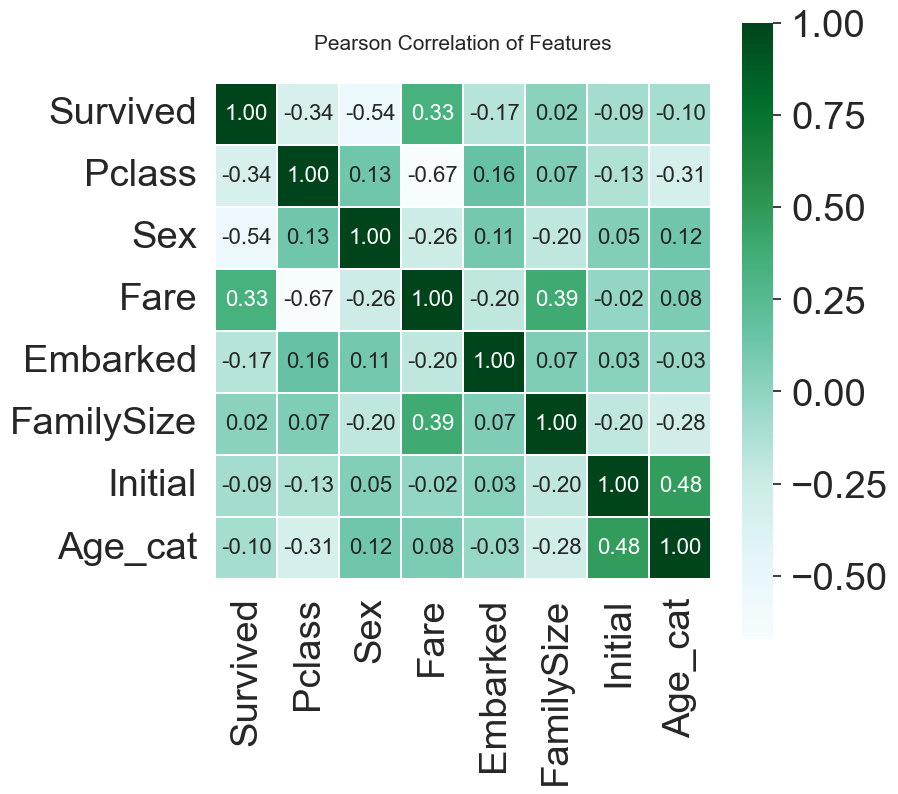

In [58]:
colormap = plt.cm.BuGn
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data=heatmap_data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,
            cmap=colormap,linecolor='white',annot=True,annot_kws={'size':16},fmt='.2f')

# linewidth 칸칸사이의 선 굵기
# linecolor 선 색깔
# annot 숫자를 나타낼지
# Heatmap을 보면 Pclass, Sex, Fare가 관계있음을 알 수 있다.
# Fare와 Pclass는 어느정도 비슷하므로 redundant하다고 표현할 수도 있음.

# One-hot Encoding
이렇게 Pandas로 할 수도 있고 sklearn에서 preprocessing - onehotencoder 쓸 수도 있음

### 만약 one-hot의 결과로 컬럼이 수십개 생긴다면? 비효율적임... 이를 해결하기 위한 방법을 나중에 알려준다고 함

In [59]:
df_train = pd.get_dummies(df_train,columns=['Initial'],prefix='Initial')
df_test = pd.get_dummies(df_test,columns=['Initial'],prefix='Initial')

In [60]:
df_train = pd.get_dummies(df_train,columns=['Embarked'],prefix='Embarked')
df_test = pd.get_dummies(df_test,columns=['Embarked'],prefix='Embarked')

# 안쓰는 컬럼 버리기

In [61]:
df_train.drop(['PassengerId','Name','Cabin','SibSp','Parch','Ticket'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','Cabin','SibSp','Parch','Ticket'],axis=1,inplace=True)

In [63]:
df_test.head() # 아유는 모르겠지만 이유한님과 다름

,Pclass,Sex,Age,Fare,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,7.8292,0,0,1,0,0,0,1,0
1,3,0,47.0,7.0000,0,0,0,1,0,0,0,1
2,2,1,62.0,9.6875,0,0,1,0,0,0,1,0
3,3,1,27.0,8.6625,0,0,1,0,0,0,0,1
4,3,0,22.0,12.2875,0,0,0,1,0,0,0,1


# SCIKIT-LEARN

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [62]:
X_train = df_train.drop('Survived',axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [63]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train,target_label,test_size=0.3,random_state=2018)

In [ ]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [ ]:
print(len(prediction))
print('총 {}명 중 {:2f}% 정확도'.format(y_vld.shape[0],100*metrics.accuracy_score(prediction, y_vld)))

In [67]:
from pandas as pd
feature_importance = model.feature_importances_
Series_feat_imp = pd.Series(feature_importance,index=df_test.columns)

plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

array([0.09187635, 0.11388709, 0.31387529, 0.09601656, 0.11302523,
       0.01015474, 0.0391431 , 0.12979561, 0.04228304, 0.00682553,
       0.01665706, 0.00871781, 0.01774259])

# Submission to Kaggle

In [ ]:
submission = pd.read_csv('../input/gender_submission.csv')
submission.head()

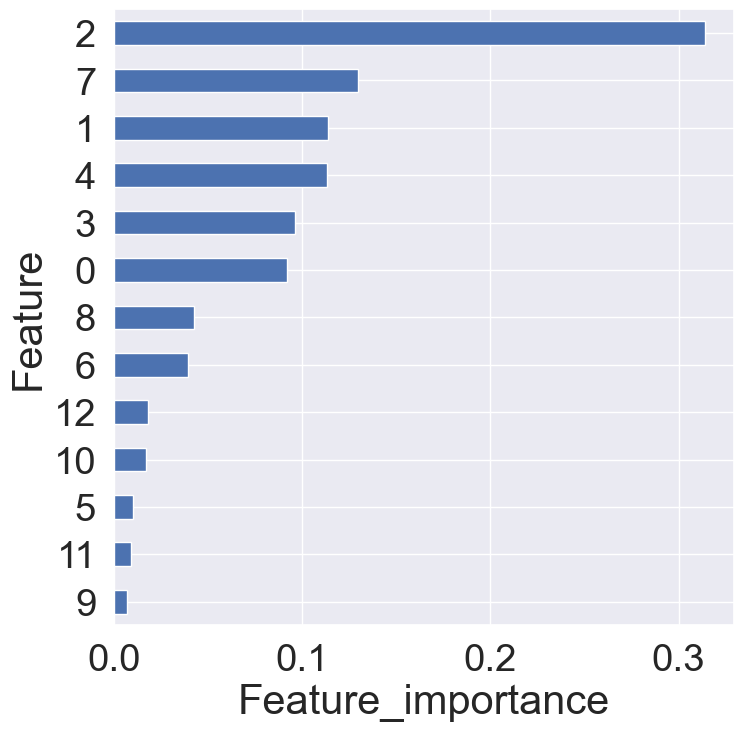

In [78]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

submission.to_csv('./my_first_submission.csv', index=False)

In [69]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Initial_0', 'Initial_1', 'Initial_2',
       'Initial_3', 'Initial_4', 'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')